In [5]:
import pandas as pd
import numpy as np

#data to use -> 
#1) convert cnmfe spikes file into a csv file that contains timestamp, the cell, and amplitude value that contains spikes
#2) use that table to align the lr index and rename cells to match global cell index  
cnmfe_spikes = r'E:\miso\LR_miso_20230807_20230810_20230815\processed\2023-08-07-12-33-18_video_green_processed-cnmfe-spikes.csv'
spikes = pd.DataFrame(pd.read_csv(cnmfe_spikes))
#get_nonzero_row = np.where(spikes['C000'] > 0)
#print(float(np.where(arr > 0)))

In [27]:

spike_files = [r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_1-cnmfe-spike-events.csv",
         r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_2-cnmfe-spike-events.csv",
         r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_3-cnmfe-spike-events.csv"]

files_to_write = [r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1-unix.csv",
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2-unix.csv",
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3-unix.csv"]
for file in range(0, len(spike_files)):
    df = pd.read_csv(spike_files[file])
    data = []
    for row in range(0, len(df)):
        at_time = df.loc[row]
        row_len = at_time.size
        for col in range(1, row_len):
            if at_time[col] > 0:
                #new_row = pd.Series([df.loc[row]['Time (s)'], df.columns[col], df.loc[row][col]])
                if df.loc[row]['Time (s)'] != 0:
                    new_row = [df.loc[row]['Time (s)'], df.columns[col], df.loc[row][col]]
                    data.append(new_row)
    new_df = pd.DataFrame(data, columns = ['Time (s)', ' Cell Name', 'Value']).sort_values(by=[' Cell Name', 'Time (s)'])
    #new_df = new_df.sort_values(by=[' Cell Name', 'Time (s)'])
    output_path= files_to_write[file]
    #if not os.path.exists(output_path):
    new_df.to_csv(output_path, index=False)
    #else:
    #    raise FileExistsError('CSV already exists')


In [12]:
def get_indexes(num_sessions_array):
    day_indexes = [0]
    i = 0
    
    for day in range(0, len(num_sessions_array) - 1):
        i += num_sessions_array[day]
        day_indexes.append(i)
    return day_indexes 

[0, 5, 12, 15]


In [22]:
files = [pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1-unix.csv"),
         pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2-unix.csv"),
         pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3-unix.csv")]

lr_df = pd.read_csv(r'E:\miso\LR_miso_20230807_20230810_20230815\processed\lr_index_table.csv')
num_sessions = [3, 4, 3]
total_sessions = np.sum(num_sessions)

day_1_df = files[0].copy()
day_2_df = files[1].copy()
day_3_df = files[2].copy()
files = [day_1_df, day_2_df, day_3_df]
spikes = [r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1-aligned-unix.csv", 
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2-aligned-unix.csv", 
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3-aligned-unix.csv"]


last_session_idx = len(num_sessions) - 1 
idx = 0
j = 0
day_indexes = get_indexes(num_sessions)
cellset_idx = 0


for _ in range(0, (len(lr_df))):
    if idx > (len(lr_df) - num_sessions[last_session_idx]):
        break
    cellset_idx = lr_df.loc[idx]['local_cellset_index']
    j = day_indexes.index(cellset_idx)

    local_idx = int(lr_df.loc[idx]['local_cell_index'])
    global_idx = int(lr_df.loc[idx]['global_cell_index'])
    #cellset_idx = int(lr_df.loc[idx]['local_cellset_index'])
    cell_to_replace = ' C' + str(local_idx).zfill(3)
    new_cell_val = ' C' + str(global_idx).zfill(3)
    files[j][' Cell Name'] = files[j][' Cell Name'].replace(cell_to_replace, new_cell_val)
    idx += num_sessions[j]

#new_df = new_df.sort_values(by=[' Cell Name', 'Time (s)'])
day_1_df.sort_values(by=[' Cell Name', 'Time (s)']).to_csv(spikes[0], index=False)
day_2_df.sort_values(by=[' Cell Name', 'Time (s)']).to_csv(spikes[1], index=False)
day_3_df.sort_values(by=[' Cell Name', 'Time (s)']).to_csv(spikes[2], index=False)

           Time (s)  Cell Name     Value
0      1.691412e+09       C000  17.80770
1      1.691412e+09       C000  17.88434
2      1.691412e+09       C000  11.42585
3      1.691412e+09       C000  18.55066
4      1.691412e+09       C000  15.78876
...             ...        ...       ...
14051  1.691421e+09       C131  39.58186
14052  1.691421e+09       C131  27.43420
14053  1.691421e+09       C131  39.67538
14054  1.691422e+09       C131  24.17802
14055  1.691422e+09       C131  45.84393

[14056 rows x 3 columns]
 C000
 C000
           Time (s)  Cell Name     Value
0      1.691668e+09       C000  24.55991
1      1.691668e+09       C000  24.55419
2      1.691668e+09       C000  26.21402
3      1.691668e+09       C000  41.04001
4      1.691668e+09       C000  27.83087
...             ...        ...       ...
22294  1.691680e+09       C211  25.80003
22295  1.691680e+09       C211  24.77601
22296  1.691680e+09       C211  17.80604
22297  1.691680e+09       C211  26.17737
22298  1.691680e+09

In [2]:
import pandas as pd

lr_df = pd.read_csv(r'E:\miso\LR_miso_20230807_20230810_20230815\processed\lr_index_table.csv')
num_sessions = [3, 4, 3]
files = [pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_1-cnmfe-spike-events.csv"),
         pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_2-cnmfe-spike-events.csv"),
         pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\day_3-cnmfe-spike-events.csv")]

# Initialize 'i' to 0 and 'session_index' to 0
i = 0
session_index = 0

for session_size in num_sessions:
    df = files[session_index]

    # Skip the first session (if not the first session)
    if session_index > 0:
        i += session_size

    for _ in range(session_size):
        local_idx = lr_df.loc[i]['local_cell_index']
        global_idx = lr_df.loc[i]['global_cell_index']
        cell_to_replace = ' C' + str(local_idx).zfill(5)
        new_cell_val = ' C' + str(global_idx).zfill(5)
        files[j][' Cell Name'] = files[j][' Cell Name'].replace(cell_to_replace, new_cell_val)

        i += 1  # Increment 'i' by 1
        print(i)

    session_index += 1  # Move to the next session

    # Print session info (optional)
    print(f"Processed session {session_index}: rows {i - session_size}-{i - 1}")


NameError: name 'j' is not defined

In [1]:
def function_with_kwargs(default, *args, **kwargs):
    print(default)
    for arg in args:
        print(arg)
    for key, value in kwargs:
        print(key)
        print(value)

function_with_kwargs = 



ModuleNotFoundError: No module named 'astropy'

In [ ]:
"""files = [r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1.csv",
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2.csv",
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3.csv"]

lr_df = pd.read_csv(r'E:\miso\LR_miso_20230807_20230810_20230815\processed\lr_index_table.csv')
num_sessions = [3, 4, 3]
total_sessions = np.sum(num_sessions)

day_1_df = pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1.csv").copy()
day_2_df = pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2.csv").copy()
day_3_df = pd.read_csv(r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3.csv").copy()
files = [day_1_df, day_2_df, day_3_df]

spikes = [r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day1-aligned.csv", 
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day2-aligned.csv", 
          r"E:\miso\LR_miso_20230807_20230810_20230815\processed\spikes-day3-aligned.csv"]


last_session_idx = len(num_sessions) - 1 # 2

# num_sdessions = [3, 4, 3]
# day_indexes =  [0, 3, 7]
idx = 0
j = 0
day_indexes = get_indexes(num_sessions)
cellset_idx = 0


for _ in range(0, (len(lr_df))):
    if idx > (len(lr_df) - num_sessions[last_session_idx]):
        break
    cellset_idx = lr_df.loc[idx]['local_cellset_index']
    j = day_indexes.index(cellset_idx)

    local_idx = int(lr_df.loc[idx]['local_cell_index'])
    global_idx = int(lr_df.loc[idx]['global_cell_index'])
    #cellset_idx = int(lr_df.loc[idx]['local_cellset_index'])
    cell_to_replace = ' C' + str(local_idx).zfill(3)
    new_cell_val = ' C' + str(global_idx).zfill(3)
    files[j][' Cell Name'] = files[j][' Cell Name'].replace(cell_to_replace, new_cell_val)
    idx += num_sessions[j]
"""

In [3]:
fruits = [[0, 1], [1,3], [5,6]]
given = [1,3]
x = next((i for i, sublist in enumerate(fruits) if sublist == given), None)

print(x)

1


In [7]:
import pandas as pd
csv = pd.read_csv(r"C:\Users\Gianna\Desktop\Analysis\lr_trajectories_test\spikes-day1-aligned-unix_run1.csv")
times_fired = csv[csv[' Cell Name'] == ' C001']['Time (s)']
print(times_fired)

69       30.648185
70       60.125553
71       66.920336
72       69.918034
73       90.802000
          ...     
138    1692.472268
139    1704.962679
140    1709.459226
141    1729.843575
142    1760.520023
Name: Time (s), Length: 74, dtype: float64


In [ ]:
       #plt.cla()
        #plt.clf()

"""def get_frame_from_time(time):
    return int(time * framerate)

def get_data_points_x(session, day, cell):
    # get times for this cell
    data = sessions_data[day][1][session]
    times_fired = data[data[' Cell Name'] == cell]['Time (s)']
    dlc = sessions_data[day][0][session]
    x_points = []
    for time in times_fired:
        frame = get_frame_from_time(time)
        x_points.append(dlc.loc[frame]['Head','x'])

    return x_points

def get_data_points_y(session, day, cell):
    # get times for this cell
    data = sessions_data[day][1][session]
    times_fired = data[data[' Cell Name'] == cell]['Time (s)']
    dlc = sessions_data[day][0][session]
    y_points = []
    for time in times_fired:
        frame = get_frame_from_time(time)
        y_points.append(dlc.loc[frame]['Head','y'])

    return y_points    


#Compute Rodent's position by averaging 'Snout', 'Head Base', 'Midpoint of Body'.

#Compute Rodent's head direction, defined by a vector from Head Base to Snout.
#
def get_angle(x,y):
    return atan2(y,x)+pi

def get_color(angle):
    return colormap(angle/(2*pi))

def get_angles(session, day, cell):
    # get times for this cell
    data = sessions_data[day][1][session]
    times_fired = data[data[' Cell Name'] == cell]['Time (s)']
    dlc = sessions_data[day][0][session]
    angles = []
    for time in times_fired:
        frame = get_frame_from_time(time)

        angles.append(get_angle(dlc.loc[frame]['Head','y'], dlc.loc[frame]['Snout', 'x']))

    return angles        

def colors(angles):
    for angle in angles:
        get_color(angle)

def spike_subplot(session, day, cell,  axis):
    
    markersize = plt.rcParams['lines.markersize'] ** 2
    x_pts = sessions_data[day][0][session]['Head', 'x']
    y_pts = sessions_data[day][0][session]['Head', 'y']
    #grab locations and head directions where events occurred
    head_x = get_data_points_x(session, day, cell)
    head_y = get_data_points_y(session, day, cell)
    angles = get_angles(session, day, cell)
    color_list = colors(angles)
    sessions_data[day][0][session]
   #plot it!
    fig = plt.figure(figsize=(2,2))
    #plt.rcParams['lines.linewidth'] = 5
    
    axis.plot(x_pts, y_pts, color='gray',linewidth=0.75, alpha=0.6,zorder=0)
    axis.scatter(head_x,head_y, s=5, c=color_list,zorder=1,clip_on=False)
    axis.axis('off')
    fig.tight_layout()
    axis.set_aspect('equal')
    return axis




    
        
def get_spike_plots_test():
    input_dir = r"C:\Users\Gianna\Desktop\Analysis\lr_trajectories_test"
    output_path = os.path.join(input_dir, 'Longitudinal Spike T1')
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    # 4
    max_row_num = np.max(rows)
    #get amount of columns needed for plot
    # 3
    num_days = len(rows)
    for cell in np.unique([' C120', ' C008']):
    #for cell in cell_names:
        print(cell)
        figure= plt.figure(figsize=(5,5))
        plt.rcParams.update({'figure.max_open_warning': 0})
        axes = []
        ax_indices = []
        #create grid size
        gs = GridSpec(nrows=max_row_num, ncols=num_days)
        # add axes to grid
        for i in range(0, max_row_num):
                for j in range(0, num_days):
                    axes.append(figure.add_subplot(gs[i, j]))
                    ax_indices.append([i, j])
                    
        for ax in axes:
            ax.axis('off')
        for day_idx in range(0, len(sessions_data)):
        #for day_idx in range(0, len(sessions_data)): 

            for session in range(0, len(sessions_data[day_idx][1])):

                timestamps = get_timestamps(day_idx, session)
                cell_event_timestamps = sessions_data[day_idx][1][session]['Time (s)'][sessions_data[day_idx][1][session][' Cell Name']==cell]
                spike_train = np.zeros_like(timestamps)

                for event_ts in cell_event_timestamps:
                    abs_diffs= abs(timestamps - event_ts)
                    spike_train[abs_diffs == np.min(abs_diffs, axis=0)] = 1

                head_x, head_y, angles = get_head_and_angles(day_idx, session)
                ax_to_plot_index = next((i for i, sublist in enumerate(ax_indices) if sublist == [session, day_idx]), None)
                ax_to_plot_spike = axes[ax_to_plot_index]
                spike_subplot(session, day_idx, cell, ax_to_plot_spike)

                #rsc_ca_analyses.path_spike_plot_subplot(head_x, head_y, angles, spike_train, destination=None, spike_sizes = 3, axis = ax_to_plot_spike)
        destination = os.path.join(output_path, f'{cell}')
        figure.tight_layout(pad=1)
        figure.savefig(destination,dpi=300)
        plt.close()
        #plt.cla()
        #plt.clf()
        #    
get_spike_plots_test()



#54223"""

In [31]:
def get_day_digit(string):
    found_digit = False
    result = "day_"
    for char in string:
        if char.isdigit():
            found_digit = True
            result += char
        elif found_digit:
            break
    return result

get_day_digit("day_14-longitudinal_spikes-aligned-unix_run2.csv")

'day_14'

In [38]:
import os 
import re

data_dir = r"f:\LR_kombucha_20230804_20230809_20230817"
directory = os.listdir(data_dir)
sessions_data = []
date_regex = re.compile(pattern=r'^[0-9]{8}')
dir_dict = {}
unique_days = set()
spike_dict = {}

for file in sorted(directory):
    if (('longitudinal_spikes'.lower() in file.lower()) & ('.csv' in file.lower())):
        day = get_day_digit(file)
        if day not in spike_dict:
            spike_dict[day]= [file]
        else:
            day_list = spike_dict[day]
            spike_dict[day]= day_list + [file]

    if (bool(date_regex.search(file))):
        m = date_regex.search(file)
        if m:
            date = m.group()
            if (('DLC'.lower() in file.lower()) & ('.csv' in file)):
                if date not in dir_dict:
                    #create new date and add new dlc csv to date key value
                    dir_dict[date] = [file]
                else:
                    dlc_list = dir_dict[date]
                    dir_dict[date] = dlc_list + [file]

idx = 0
for day in spike_dict.keys():
    day_label = day
    sessions_data.append([[], spike_dict[day_label]])
    idx += 1

idx = 0
for day in dir_dict.keys():
    day_num = day
    sessions_data[idx][0] += dir_dict[day_num]
    idx += 1

print(sessions_data[2])

[['20230817_kombucha_session1_LOF_color_rawDLC_resnet50_20220705_pickle_session3_OF_HighRes_DLCJul8shuffle1_103000.csv', '20230817_kombucha_session2_LOF_color_rawDLC_resnet50_20220705_pickle_session3_OF_HighRes_DLCJul8shuffle1_103000.csv', '20230817_kombucha_session3_LOF_color_rawDLC_resnet50_20220705_pickle_session3_OF_HighRes_DLCJul8shuffle1_103000.csv'], ['day_3-longitudinal_spikes-aligned-unix_run1.csv', 'day_3-longitudinal_spikes-aligned-unix_run2.csv', 'day_3-longitudinal_spikes-aligned-unix_run3.csv']]


In [2]:
import pandas as pd
import numpy as np

def get_session_number(file, string_to_search):
    if string_to_search in file:
        start_idx = file.index(string_to_search)
        found_session_num = False
        result = ""
        #find sequential numbers after session for the numbers
        for char in file[(start_idx + len(string_to_search)):]:
            if char.isdigit():
                found_session_num = True
                result += char
            elif found_session_num:
                break
        return int(result)


####** Input length of arena and coordinates of barriers in an array**####
#find number of unique sessions in directory using their file names
def find_num_sessions():
    session_numbers = set()
    for file in os.listdir(r"C:\Users\Gianna\Desktop\Analysis\20230214_kimchi"):
        if (('run' in file) & ('.csv' in file)):
            num_session = get_session_number(file, 'run')
            session_numbers.add(num_session)
    session_numbers = sorted(list(session_numbers))
    num_sessions = len(session_numbers)
    return session_numbers


def get_files():
    dlc_dict = {}
    spike_dict = {}
    for file in os.listdir(r"C:\Users\Gianna\Desktop\Analysis\20230214_kimchi"):
        if (('DLC' in file) & ('.csv' in file)):
            session_to_add = get_session_number(file, 'session')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in dlc_dict:
                dlc_dict[session_to_add] = file
        elif (('run' in file) & ('.csv' in file)):
            session_to_add = get_session_number(file, 'run')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in spike_dict:
                spike_dict[session_to_add] = file
    sessions_data = []
    for num in find_num_sessions():
        name = f'session{num}'
        sessions_data.append([dlc_dict[name], spike_dict[name]])
    return sessions_data

def frame_num_to_seconds(frame_num):
    return frame_num / 30


def timestamps_from_dlc_frames():
    frames = []
    timestamps = []
    for i in range(0, len(pd.read_csv(r"C:\Users\Gianna\Desktop\Analysis\20230214_kimchi\20230214_kimchi_session3_N-S_DLC.csv"))):
        frames.append(i)

    for frame in frames:
        timestamps.append(float(frame_num_to_seconds(frame)))

    #timestamps = [frame_num_to_seconds(frame) for frame in frames]
    return np.array(timestamps)

print(timestamps_from_dlc_frames())


[0.00000000e+00 3.33333333e-02 6.66666667e-02 ... 1.81370000e+03
 1.81373333e+03 1.81376667e+03]


C:\Users\Gianna\AppData\Local\Temp\ipykernel_9236\1257270394.py:59: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  for i in range(0, len(pd.read_csv(r"C:\Users\Gianna\Desktop\Analysis\20230214_kimchi\20230214_kimchi_session3_N-S_DLC.csv"))):


In [68]:
def get_files():
    dlc_dict = {}
    spike_dict = {}
    time_dict = {}
    for file in self.directory:
        if (('DLC' in file) & (file.endswith('.csv'))):
            session_to_add = get_session_number(file, 'session')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in dlc_dict:
                dlc_dict[session_to_add] = file
        elif (('run' in file) & (file.endswith('.csv'))):
            session_to_add = get_session_number(file, 'run')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in spike_dict:
                spike_dict[session_to_add] = file
        #else:
        #    session_to_add = self.get_session_number(file, 'session')
        #    session_to_add = f'session{session_to_add}'
        #    if session_to_add not in time_dict:
        #        time_dict[session_to_add] = file
    sessions_data = []
    for num in [2]:
        name = f'session{num}'
        sessions_data.append([pd.read_csv(os.path.join(self.main_dir, dlc_dict[name]), header=[1,2]),
                                pd.read_csv(os.path.join(self.main_dir, spike_dict[name])),
                                    pd.read_csv(os.path.join(self.main_dir, time_dict[name]))])
    return sessions_data



"""    def get_timestamps(time_csv):
        timestamp_data = time_csv / 1000.
        #start the session at time 0
        timestamp_data = timestamp_data - np.min(timestamp_data)
        #make an array for easy use
        timestamps = np.array(timestamp_data).flatten()
        timestamps = np.concatenate([timestamps,[timestamps[-1]]])
        return timestamps"""






[0.0, 0.03333333333333333, 0.06666666666666667, 0.1, 0.13333333333333333, 0.16666666666666666, 0.2, 0.23333333333333334, 0.26666666666666666, 0.3, 0.3333333333333333, 0.36666666666666664, 0.4, 0.43333333333333335, 0.4666666666666667, 0.5, 0.5333333333333333, 0.5666666666666667, 0.6, 0.6333333333333333, 0.6666666666666666, 0.7, 0.7333333333333333, 0.7666666666666667, 0.8, 0.8333333333333334, 0.8666666666666667, 0.9, 0.9333333333333333, 0.9666666666666667, 1.0, 1.0333333333333334, 1.0666666666666667, 1.1, 1.1333333333333333, 1.1666666666666667, 1.2, 1.2333333333333334, 1.2666666666666666, 1.3, 1.3333333333333333, 1.3666666666666667, 1.4, 1.4333333333333333, 1.4666666666666666, 1.5, 1.5333333333333334, 1.5666666666666667, 1.6, 1.6333333333333333, 1.6666666666666667, 1.7, 1.7333333333333334, 1.7666666666666666, 1.8, 1.8333333333333333, 1.8666666666666667, 1.9, 1.9333333333333333, 1.9666666666666666, 2.0, 2.033333333333333, 2.066666666666667, 2.1, 2.1333333333333333, 2.1666666666666665, 2.2

In [8]:
import os

def get_session_number(file, string_to_search):
    if string_to_search in file:
        start_idx = file.index(string_to_search)
        found_session_num = False
        result = ""
        #find sequential numbers after session for the numbers
        for char in file[(start_idx + len(string_to_search)):]:
            if char.isdigit():
                found_session_num = True
                result += char
            elif found_session_num:
                break
        return int(result)




def get_files():
    dlc_dict = {}
    spike_dict = {}
    main_dir = r"C:\Users\Gianna\Desktop\Analysis\plot script test"
    directory = sorted(os.listdir(r"C:\Users\Gianna\Desktop\Analysis\plot script test"))
    #time_dict = {}
    for file in directory:
        if (('DLC' in file) & (file.endswith('.csv'))):
            session_to_add = get_session_number(file, 'session')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in dlc_dict:
                dlc_dict[session_to_add] = file
        elif (('run' in file) & (file.endswith('.csv'))):
            session_to_add = get_session_number(file, 'run')
            session_to_add = f'session{session_to_add}'
            if session_to_add not in spike_dict:
                spike_dict[session_to_add] = file
    sessions_data = []
    for num in [2]:
        name = f'session{num}'
        print(os.path.join(main_dir, dlc_dict[name]))
        sessions_data.append([pd.read_csv(os.path.join(main_dir, dlc_dict[name]), header=[1,2]), pd.read_csv(os.path.join(main_dir, spike_dict[name]))])
    print(len(sessions_data[0]))
get_files()

C:\Users\Gianna\Desktop\Analysis\plot script test\20230728_kombucha_session2_E-WBarrier_DLC.csv
2


In [4]:
import re
def get_cell_num_from_name(cell_name):
    match = re.search(r'C(\d+)', cell_name.strip())
    if match:
        cell_num = int(match.group(1))
        return cell_num
print(get_cell_num_from_name(' C1000'))

1000


In [7]:
len(str(get_cell_num_from_name(' C1000')))
cells = ['C' + str(30).zfill(len(str(get_cell_num_from_name(' C1000'))))]
print(' C' + str(2).zfill(4))

 C0002


In [2]:
def get_cell_name(self, cell_num):
    max_cell_digits = len(str(self.find_max_cell_day()))
    return ' C' + str(cell_num).zfill(max_cell_digits)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


[(0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0)]


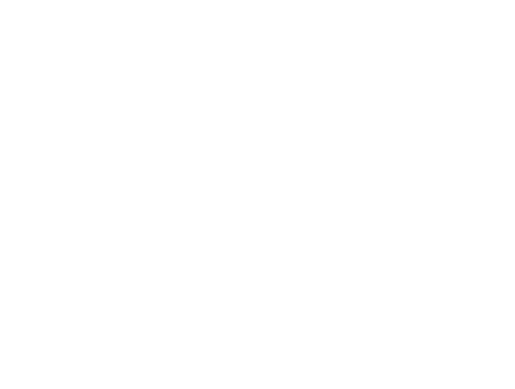

In [7]:
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
figure = plt.figure()
gs = GridSpec(nrows=5, ncols=3)
axes = [figure.add_subplot(gs[i, j]).axis('off') for j in range(0, 3) for i in range(0, 5)]
#axes = [ax.axis('off') for ax in axes]
print(axes)

In [1]:
def test(*args):
    if 'ebc boundary' in args:
        print('yyes')

test('ebc boundary', 'trajectory')

yyes


In [1]:
def get_session_number(file, string_to_search):
    if string_to_search in file:
        start_idx = file.index(string_to_search)
        found_session_num = False
        result = ""
        # begin searching for session num in all chars after the input string
        for char in file[(start_idx + len(string_to_search)):]:
            if char.isdigit():
                found_session_num = True
                result += char
            elif found_session_num:
                break
        return int(result)
    
print(get_session_number(r'F:/timeseries-spikes_run251_3', 'run'))

251


In [1]:
print(float(30))

30.0


In [5]:
list_arg = [i for i in range(5)]
tuple_args = tuple(list_arg)
def test(firstarg, *args):
    for arg in args:
        print(fr'the first argument is {firstarg}, the arg keyword is {arg}')
test('first', *tuple_args)

the first argument is first, the arg keyword is 0
the first argument is first, the arg keyword is 1
the first argument is first, the arg keyword is 2
the first argument is first, the arg keyword is 3
the first argument is first, the arg keyword is 4


In [6]:
plot_dict = {'spike_plot': 'line', 'hd_curve_line': 'line_color', 'spike':'spike_size'}
def get_plot_args():
    plot_list = []
    for key, value in plot_dict.items():
        if value:
            plot_list.append(key)
    return tuple(plot_list)
get_plot_args()

('spike_plot', 'hd_curve_line', 'spike')

In [3]:
def test(default_arg, *args, **kwargs):
    for key, item in kwargs.items():
        print(f'Default arg is {default_arg}, and keyword is {key}, {item}')
    print(args)

test('default', *('spike', 'hd', 'ebc'), **{'line_color_spike': 'red', 'spike_color': 'gray'})

Default arg is default, and keyword is line_color_spike, red
Default arg is default, and keyword is spike_color, gray
('spike', 'hd', 'ebc')


In [9]:
from colour import Color

def check_color(color):
    try:
        # Converting 'deep sky blue' to 'deepskyblue'
        color = color.replace(" ", "")
        Color(color)
        # if everything goes fine then return True
        return True
    except Exception: # The color code was not found
        return False
    
check_color('hello')

False

In [33]:
plot_dict = {'spike_plot': True, 'ebc_boundary': False, 'ebc_barrier': False, 'ebc_boundary_barrier': False, 'heatmap': False, 'hd_curve': False}


def get_plot_args():
    plot_list = [key for key, value in plot_dict.items() if value]
    if len(plot_list) == 1:
        return plot_list[0]
    else:
        return plot_list

def test(default, *args):
    print(default)
    print(args)
    #print(args)
    #print(len(args))

a = get_plot_args()

test('default', a)

default
('s', 'p', 'i', 'k', 'e', '_', 'p', 'l', 'o', 't')


In [38]:
spike_plot = ['spike_plot']
print(len(tuple(spike_plot)))

def test(*args):
    print(args)

test(*tuple(spike_plot))

1
('spike_plot',)


In [4]:
non = [[[None, None], [None, None]] for _ in range(5)]
non[1] = [[20, 30], [30, 20]]
print(non)

[[[None, None], [None, None]], [[20, 30], [30, 20]], [[None, None], [None, None]], [[None, None], [None, None]], [[None, None], [None, None]]]


In [ ]:
from PyQt5.QtWidgets import QLineEdit
line_edits = []
for _ in range(5):
    new_line = QLineEdit()
    line_edits.append(new_line)
print(line_edits)

: 

In [2]:
line_edits = []
for _ in range(5):
    new_line = "line_edit_1"
    line_edits.append(new_line)
print(line_edits)

['line_edit_1', 'line_edit_1', 'line_edit_1', 'line_edit_1', 'line_edit_1']


In [2]:
from PyQt5.QtWidgets import QLineEdit, QHBoxLayout, QMainWindow, QDialog, QTableWidget

In [ ]:
def access_widget(int):
    layout = QHBoxLayout()
    layout.addWidget(QLineEdit())
    layout.addWidget(QLineEdit())
    window = QMainWindow()
    window.setLayout(layout)
    item = layout.itemAtPosition(int)
    line_edit = item.widget()
    return line_edit

access_widget(0).text()


: 

In [1]:
def insert_row():
    window = QMainWindow()
    layout = QHBoxLayout()
    window.setLayout(layout)
    new_row = []
    new_layout = QHBoxLayout()
    for i in range(5):
        line_edit = QLineEdit()
        if i == 0:
            new_row['session_num'] = line_edit
        elif i == 1:
            new_row['barrier_x_start'] = line_edit
        elif i == 2:
            new_row['barrier_y_start'] = line_edit
        elif i == 3:
            new_row['barrier_x_end'] = line_edit
        elif i == 4:
            new_row['barrier_y_end'] = line_edit
        #new_row.append(line_edit.text())
        new_layout.addWidget(line_edit)

        layout.addLayout(new_layout)
        line_edits.append(new_row)

insert_row()

NameError: name 'QMainWindow' is not defined

In [ ]:
widget = QLineEdit()
first_layout = QHBoxLayout()
first_layout.addWidget(widget)
print(first_layout.count())

: 

In [2]:
class Window(QDialog):
    def __init__(self):
        super().__init__()
        self.widget = QLineEdit()
        self.first_layout = QHBoxLayout()
        self.first_layout.addWidget(self.widget)
        self.setLayout(self.first_layout)

    def get_item(self):
        return self.first_layout.count()
    

win = Window()
win.get_item()
#edits = [first_layout]
# for i in range(2):
#     row = []
#     line_edits = QHBoxLayout()
#     row.append(line_edits)
#     #line_edits.addWidget(QLineEdit())
#     edits.append(row)

: 